#### Bibliotecas utilizadas

In [401]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from matplotlib import image 
from skimage import transform 

#### I Projeções

##### Carregamento dos pontos

In [405]:
pontos3D_1 = np.load("Arquivos//Pontos3D_1.npy")
pontos2D_1 = np.load("Arquivos//Pontos2D_1.npy")
pontos3D_2 = np.load("Arquivos//Pontos3D_2.npy") 
pontos2D_2 = np.load("Arquivos//Pontos2D_2.npy")

#### Visualização dos pontos no espaço 3D

##### Primeiro conjunto de pontos

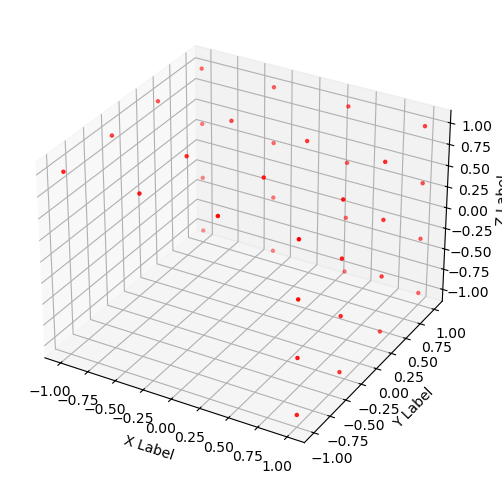

In [409]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(pontos3D_1[:, 0], pontos3D_1[:, 1], pontos3D_1[:, 2], c='r', marker='.')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

##### Segundo conjunto de pontos

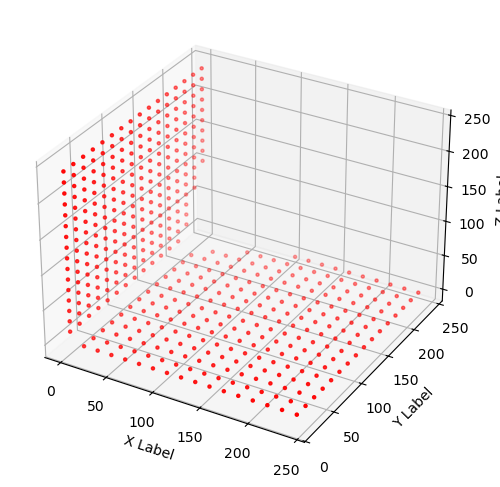

In [412]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(pontos3D_2[:, 0], pontos3D_2[:, 1], pontos3D_2[:, 2], c='r', marker='.')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

#### Rotina para o cálculo a matriz P da câmera

In [415]:
# Cálculo da matriz da câmera utilizando o algoritmo DLT
def find_camera_matrix(pontos2D,pontos3D):

    n = pontos3D.shape[0]
    A = np.zeros((2 * n, 12)) 
    
    cube_image_norm, T_img = normalize_points(pontos2D[:,0:2]);
    cube_3d_norm, T_cube   = normalize_points_3d(pontos3D[:,0:3]);
    
    for i in range(n):
        X, Y, Z      = cube_3d_norm[i]
        x, y         = cube_image_norm[i]
        A[2 * i]     = [X, Y, Z, 1, 0, 0, 0, 0, -x * X, -x * Y, -x * Z, -x]
        A[2 * i + 1] = [0, 0, 0, 0, X, Y, Z, 1, -y * X, -y * Y, -y * Z, -y]
    
    A = np.array(A)
    U, S, Vt = linalg.svd(A)
    P  = Vt[-1].reshape(3, 4)
    P  = linalg.inv(T_img) @ P @ T_cube
    
    return P

#### Cálculo das matrizes das câmeras para os dois conjuntos de pontos 

In [418]:
P1 = find_camera_matrix(pontos2D_1,pontos3D_1)
P2 = find_camera_matrix(pontos2D_2,pontos3D_2)

# Matriz P
print("Matriz da câmera para o primeiro conjunto de pontos:")
print("")
print(P1) 
print("")
print("Matriz da câmera para o segundo conjunto de pontos:")
print("")
print(P2) 

Matriz da câmera para o primeiro conjunto de pontos:

[[ 8.83055123e+01  1.61807450e+01 -5.67333001e+01 -1.91011773e+02]
 [-2.67721389e+01  9.92211554e+01 -2.67721389e+01 -1.82707763e+02]
 [ 5.25327991e-02  5.38460731e-02  5.25327991e-02 -6.35646499e-01]]

Matriz da câmera para o segundo conjunto de pontos:

[[ 1.36046870e+00  1.69760912e-01 -6.08513164e-01  1.56942111e+02]
 [ 1.00207009e-02  1.44483974e+00  7.30308350e-02 -8.20691285e+00]
 [ 9.77568476e-04  3.41690191e-04  1.00620607e-03  4.29610914e-01]]


#### Erro de projeção para os pontos projetados pelas matrizes das câmeras 

##### Primeiro conjunto de pontos

##### Erro médio de projeção

In [423]:
erro1, pts_proj1 = projection_error(pontos3D_1, pontos2D_1, P1)
print("Erro médio de projeção:", np.mean(erro1))

Erro médio de projeção: 3.3326630147200185e-07


##### Pontos no plano de projeção da imagem

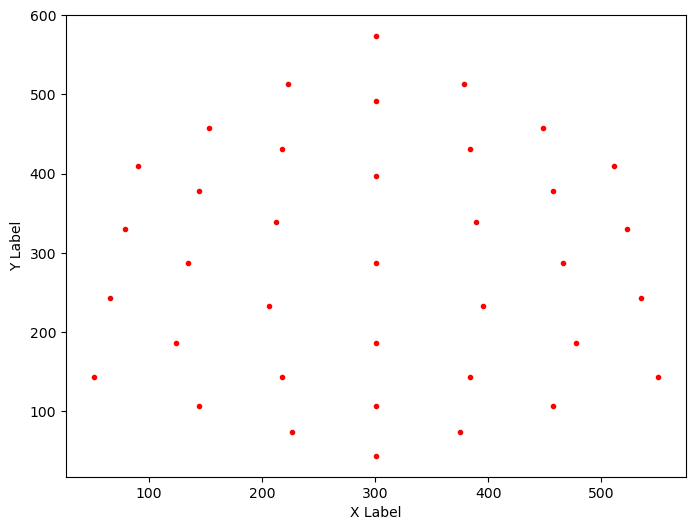

In [426]:
plt.figure(figsize=(8,6))
plt.scatter(pts_proj1[:, 0], pts_proj1[:, 1], c='r', marker='.')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

##### Segundo conjunto de pontos

##### Erro médio de projeção

In [430]:
erro, pts_proj2 = projection_error(pontos3D_2, pontos2D_2, P2)
print("Erro médio de projeção:", np.mean(erro))

Erro médio de projeção: 0.8546478378547889


##### Pontos no plano de projeção da imagem

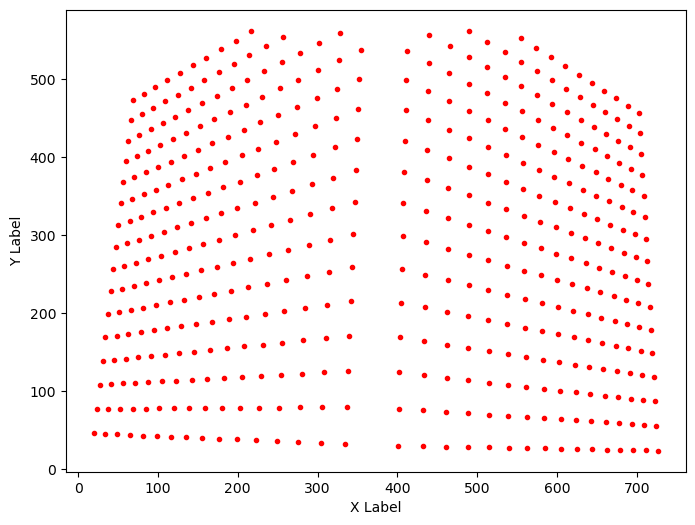

In [433]:
plt.figure(figsize=(8,6))
plt.scatter(pts_proj2[:, 0], pts_proj2[:, 1], c='r', marker='.')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

#### Cálculo das matrizes das câmeras para os pontos com ruído

In [436]:
# Primeiro conjunto de pontos
max3D1                   = np.max(np.abs(pontos3D_1))
epsilon1                 = 0.05 * max3D1
pontos3D_ruido1          = add_white_noise(pontos3D_1, epsilon1)
P_ruido1                 = find_camera_matrix(pontos2D_1, pontos3D_ruido1)
erro_ruido1, proj_ruido1 = projection_error(pontos3D_ruido1, pontos2D_1, P_ruido1)

# Segundo conjunto de pontos
max3D2                   = np.max(np.abs(pontos3D_2))
epsilon2                 = 0.05 * max3D2
pontos3D_ruido2          = add_white_noise(pontos3D_2, epsilon2)
P_ruido2                 = find_camera_matrix(pontos2D_2, pontos3D_ruido2)
erro_ruido2, proj_ruido2 = projection_error(pontos3D_ruido2, pontos2D_2, P_ruido2)

# Matriz P
print("Matriz da câmera para o primeiro conjunto de pontos com ruído:")
print("")
print(P_ruido1) 
print("")
print("Erro médio com ruído:", np.mean(erro_ruido1))
print("")
print("Matriz da câmera para o segundo conjunto de pontos com ruído:")
print("")
print(P_ruido2) 
print("")
print("Erro médio com ruído:", np.mean(erro_ruido2))

Matriz da câmera para o primeiro conjunto de pontos com ruído:

[[-8.67313048e+01 -1.71825190e+01  5.73849559e+01  1.89893895e+02]
 [ 2.35982124e+01 -1.02828012e+02  2.42410556e+01  1.83435888e+02]
 [-4.99706922e-02 -5.92638213e-02 -5.00424825e-02  6.35452198e-01]]

Erro médio com ruído: 9.881269571218182

Matriz da câmera para o segundo conjunto de pontos com ruído:

[[-1.36001272e+00 -1.54296238e-01  5.84565843e-01 -1.56620038e+02]
 [-1.13442458e-02 -1.44316495e+00 -7.49944085e-02  8.46397768e+00]
 [-9.80488682e-04 -3.34779664e-04 -1.02971960e-03 -4.27920739e-01]]

Erro médio com ruído: 36.90368604082465


#### Cálculo das matrizes das câmeras para os pontos substituídos

In [439]:
# Primeiro conjunto de pontos
max3D_1                                = np.max(np.abs(pontos3D_1))
pontos3D_substituidos1                 = replace_pts(pontos3D_1[:,0:3], max3D_1)
n1                                     = pontos3D_substituidos1.shape[0]
pontos3D_substituidos1                 = np.hstack((pontos3D_substituidos1, np.ones((n1, 1))))
P_substituidos1                        = find_camera_matrix(pontos2D_1,pontos3D_substituidos1)
erro_substituidos1, proj_substituidos1 = projection_error(pontos3D_substituidos1, pontos2D_1, P_substituidos1)
print("Erro médio com substituições para o conjunto 1:")
print(np.mean(erro_substituidos1))
print("")

# Segundo conjunto de pontos
max3D_2                                = np.max(np.abs(pontos3D_2))
pontos3D_substituidos2                 = replace_pts(pontos3D_2[:,0:3], max3D_2)
n2                                     = pontos3D_substituidos2.shape[0]
pontos3D_substituidos2                 = np.hstack((pontos3D_substituidos2, np.ones((n2, 1))))
P_substituidos2                        = find_camera_matrix(pontos2D_2,pontos3D_substituidos2)
erro_substituidos2, proj_substituidos2 = projection_error(pontos3D_substituidos2, pontos2D_2, P_substituidos2)

print("Erro médio com substituições para o conjunto 2:")
print(np.mean(erro_substituidos2))

Erro médio com substituições para o conjunto 1:
60.067516070924455

Erro médio com substituições para o conjunto 2:
1766.6700937249873


#### Funções auxiliares utilizadas

##### Função para normalização dos pontos 

In [443]:
def normalize_points_3d(points):
    # Calcula o centróide dos pontos 3D
    centroid = np.array([np.mean(points[:, 0]), np.mean(points[:, 1]), np.mean(points[:, 2])])
    
    # Centraliza os pontos em relação ao centróide
    shifted_points = np.transpose(np.array([points[:, 0] - centroid[0], 
                                            points[:, 1] - centroid[1], 
                                            points[:, 2] - centroid[2]]))
    
    # Calcula a distância média dos pontos ao centróide
    avg_dist = 0
    number_pts = points.shape[0]
    for i in range(number_pts):
        avg_dist += np.sqrt((shifted_points[i, 0] ** 2 + shifted_points[i, 1] ** 2 + shifted_points[i, 2] ** 2))
    avg_dist /= number_pts
    
    # Determina o fator de escala para normalizar os pontos
    scale = np.sqrt(3) / avg_dist
    
    # Cria a matriz de transformação para normalização
    T = np.array([[scale, 0, 0, -scale * centroid[0]], 
                  [0, scale, 0, -scale * centroid[1]], 
                  [0, 0, scale, -scale * centroid[2]], 
                  [0, 0, 0, 1]])
    
    # Adiciona coordenadas homogêneas aos pontos e aplica a transformação
    n = points.shape[0]
    homogeneous_points = np.hstack((points, np.ones((n, 1))))
    normalized_points_homogeneous = (T @ homogeneous_points.T).T
    normalized_points = normalized_points_homogeneous[:, :3]  # Retira a última coluna (coordenada homogênea)

    return normalized_points, T

def normalize_points(points):
    # Calcula o centróide dos pontos 2D
    centroid = np.array([np.mean(points[:, 0]), np.mean(points[:, 1])])
    
    # Centraliza os pontos em relação ao centróide
    shifted_points = np.transpose(np.array([points[:, 0] - centroid[0], points[:, 1] - centroid[1]]))
    
    # Calcula a distância média dos pontos ao centróide
    avg_dist = 0
    number_pts = points.shape[0]
    for i in range(number_pts):
        avg_dist += np.sqrt(shifted_points[i, 0] ** 2 + shifted_points[i, 1] ** 2)
    avg_dist /= number_pts
    
    # Determina o fator de escala para normalizar os pontos
    scale = np.sqrt(2) / avg_dist
    
    # Cria a matriz de transformação para normalização
    T = np.array([[scale, 0, -scale * centroid[0]], 
                  [0, scale, -scale * centroid[1]], 
                  [0, 0, 1]])
    
    # Adiciona coordenadas homogêneas aos pontos e aplica a transformação
    n = points.shape[0]
    homogeneous_points = np.hstack((points, np.ones((n, 1))))
    normalized_points_homogeneous = (T @ homogeneous_points.T).T
    normalized_points = normalized_points_homogeneous[:, :2]  # Retira a última coluna (coordenada homogênea)

    return normalized_points, T

##### Função para o cálculo do erro de projeção

In [446]:
def projection_error(pontos3D, pontos2D, P):
   
    n        = pontos3D.shape[0]    
    erro     = np.zeros((n,1))
    pts_proj = np.zeros((n,3))

    for i in range(n):
        pts_proj[i] = P @ pontos3D[i,:]
        pts_proj[i] = pts_proj[i] / pts_proj[i,-1]
        erro[i]     = np.linalg.norm(pontos2D[i,:] - pts_proj[i])
        
    return erro,pts_proj

##### Função para adicionar ruído branco aos conjuntos de pontos

In [449]:
def add_white_noise(pontos3D, epsilon):
    noise = epsilon * np.random.randn(*pontos3D[:,0:3].shape)
    noise = np.hstack((noise, np.zeros((pontos3D.shape[0], 1))))
    return pontos3D + noise 

##### Função para substituir parte dos pontos

In [452]:
def replace_pts(pontos3D, max3D):
    
    num_pontos                    = pontos3D.shape[0]
    num_substituir                = int(0.2 * num_pontos)
    indices                       = np.random.choice(num_pontos, num_substituir, replace=False)
    pontos_aleatorios             = np.random.uniform(-max3D / 2, max3D / 2, size=(num_substituir, 3))
    pontos3D_modificados          = pontos3D.copy()
    pontos3D_modificados[indices] = pontos_aleatorios
    
    return pontos3D_modificados

#### Considerações

##### Como foi possível verificar as matrizes obtidas aproximaram de forma razoável as matrizes das câmeras dado que os erros de projeção encontrados foram pequenos, módulos menores que 1, com o segundo conjunto de pontos apresentando um erro maior. Ao acrescentar ruído, assim como substituir 20 % dos pontos a acurácia da matriz da câmera obtida foi reduzida e os erros de projeção aumentaram em especial para os pontos substituídos aos quais os erros foram consideravelmente maiores.      

#### II Homografias

#### Visualizando os pontos
##### Primeira imagem

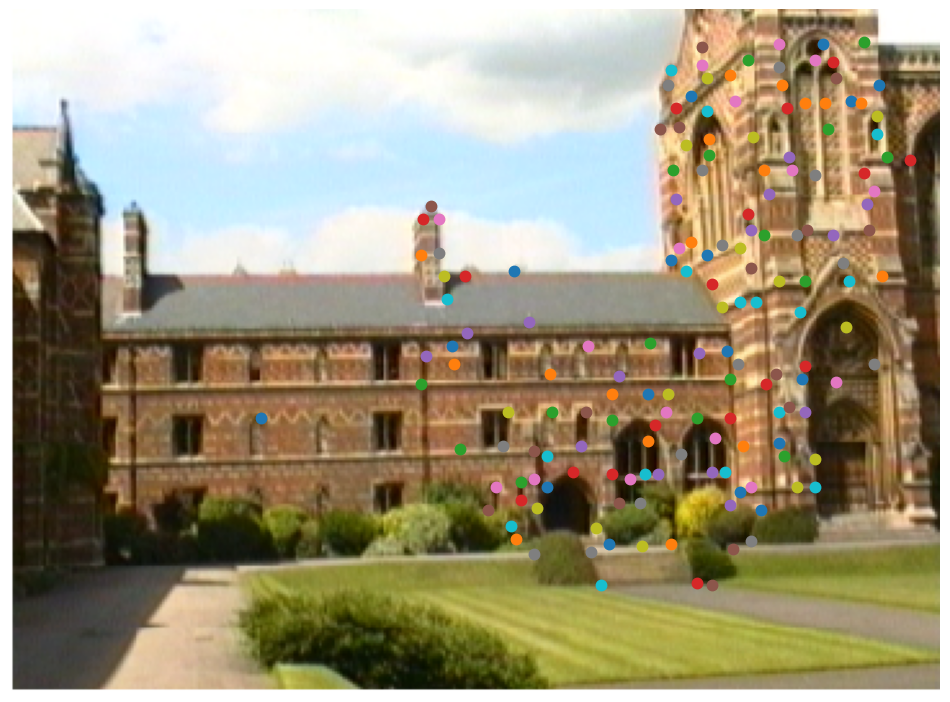

In [458]:
homografia1 = np.loadtxt('Arquivos//homografia_1.txt')
img1 = image.imread('Imagens//img_homografia_1.png')

plt.figure(figsize=(12, 10))  

# Plotar os pontos
for i in range(homografia1.shape[0]):
    plt.plot(homografia1[i, 1], homografia1[i, 0], '.', markersize=15)

# Exibir a imagem
plt.imshow(img1)
plt.axis('off')  
plt.show()

##### Segunda imagem

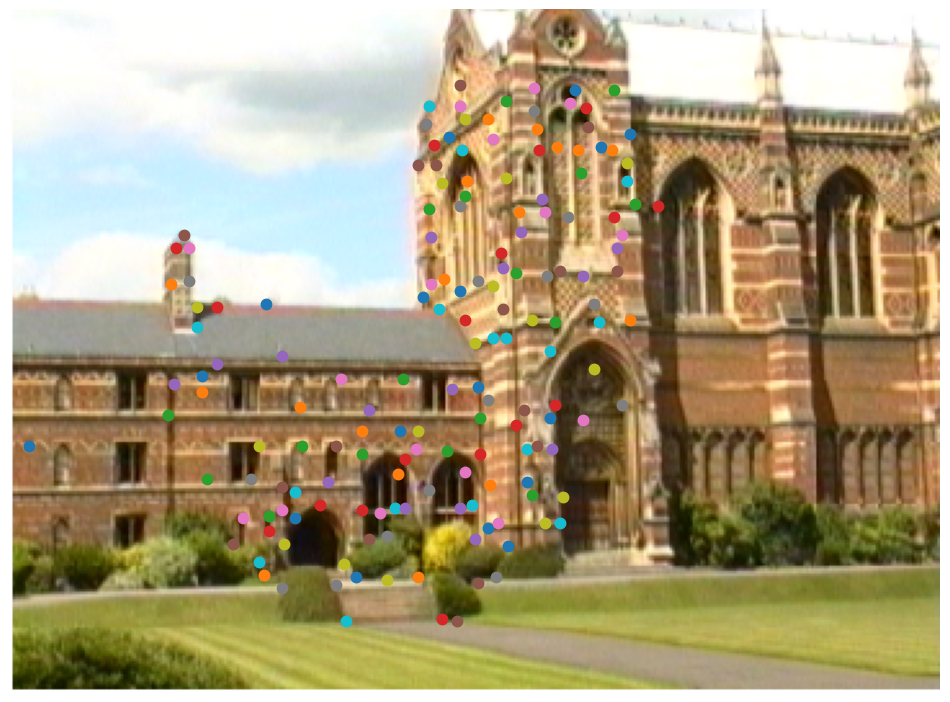

In [461]:
homografia2 = np.loadtxt('Arquivos//homografia_2.txt')
img2 = image.imread('Imagens//img_homografia_2.png')

plt.figure(figsize=(12, 10))  

# Plotar os pontos
for i in range(homografia2.shape[0]):
    plt.plot(homografia2[i, 1], homografia2[i, 0], '.', markersize=15)

# Exibir a imagem
plt.imshow(img2)
plt.axis('off')  
plt.show()

#### Calculando a homografia entre as duas imagens

In [464]:
# Homografia que leva a primeira imagem na segunda
H12 = find_homography(homografia1, homografia2)

# Homografia que leva a segunda imagem na primeira
H21 = find_homography(homografia2, homografia1)

#### Aplicando as transformações nas imagens

In [467]:
img2_lin = apply_homography_with_offset(img1, H12)
img1_lin = apply_homography_with_offset(img2, H21)

#### Resultados
##### Homografia H12

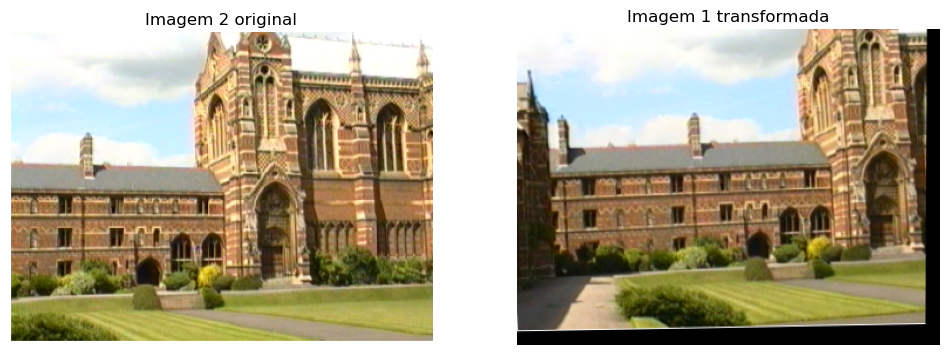

In [470]:
fig = plt.figure(figsize=(12, 10))

# Subplot 1: Imagem 2 original
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img2)
ax1.set_title('Imagem 2 original')
ax1.axis('off')  # Ocultar os eixos

# Subplot 2: Imagem 1 transformada
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img2_lin)
ax2.set_title('Imagem 1 transformada')
ax2.axis('off')  # Ocultar os eixos

plt.show()

##### Homografia H21

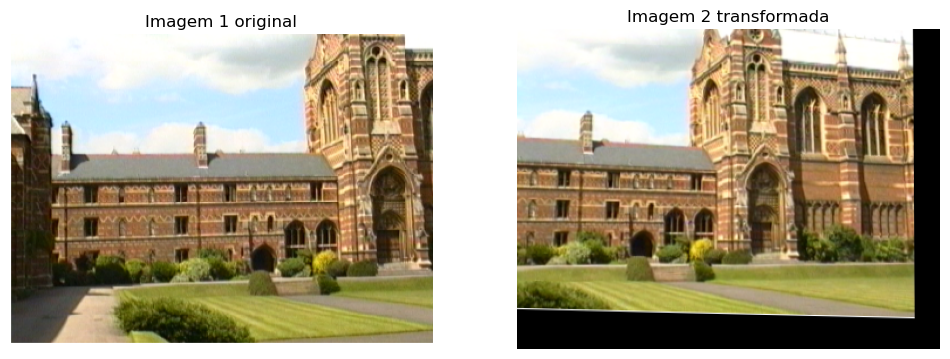

In [473]:
fig = plt.figure(figsize=(12, 10))

# Subplot 1: Imagem 2 original
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img1)
ax1.set_title('Imagem 1 original')
ax1.axis('off')  # Ocultar os eixos

# Subplot 2: Imagem 1 transformada
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img1_lin)
ax2.set_title('Imagem 2 transformada')
ax2.axis('off')  # Ocultar os eixos

plt.show()

#### Funções utilizadas

In [476]:
def normalize_points(points):
    n = points.shape[0]
    centroid = np.mean(points, axis=0)
    dist = np.sqrt(np.sum((points - centroid) ** 2, axis=1))
    mean_dist = np.mean(dist)

    scale = np.sqrt(2) / mean_dist
    T = np.array([
        [scale, 0, -scale * centroid[0]],
        [0, scale, -scale * centroid[1]],
        [0, 0, 1]
    ])

    points_homogeneous = np.hstack((points, np.ones((n, 1))))
    normalized_points = (T @ points_homogeneous.T).T
    return normalized_points[:, :2], T

def find_homography(points_source, points_target):
    n = points_source.shape[0]
    A = np.zeros((2 * n, 9))

    normalized_source, T_source = normalize_points(points_source)
    normalized_target, T_target = normalize_points(points_target)

    for i in range(n):
        x, y = normalized_source[i, 0], normalized_source[i, 1]
        x_t, y_t = normalized_target[i, 0], normalized_target[i, 1]
        A[2 * i] = [0, 0, 0, -x, -y, -1, y_t * x, y_t * y, y_t]
        A[2 * i + 1] = [x, y, 1, 0, 0, 0, -x_t * x, -x_t * y, -x_t]

    _, _, V = np.linalg.svd(A)
    h = V[-1]  
    H = h.reshape((3, 3))  
    H = np.linalg.inv(T_target) @ H @ T_source
    H /= H[2, 2]  

    return H

def apply_homography_with_offset(img, H, output_shape=None):
    corners = np.array([[0, 0], [img.shape[1], 0], [img.shape[1], img.shape[0]], [0, img.shape[0]]])
    transformed_corners = transform.ProjectiveTransform(matrix=H)(corners)

    min_x = np.min(transformed_corners[:, 0])
    min_y = np.min(transformed_corners[:, 1])
    offset = transform.AffineTransform(translation=(-min_x, -min_y))

    if output_shape is None:
        max_x = np.max(transformed_corners[:, 0]) - min_x
        max_y = np.max(transformed_corners[:, 1]) - min_y
        output_shape = (int(max_y), int(max_x))

    adjusted_H = offset.params @ H
    warped_img = transform.warp(img, adjusted_H, output_shape=output_shape)
    
    return warped_img

#### III Correção de Perspectiva

##### Ao escolher as coordenadas dos pontos na posição Z=0 no eixo de coordenadas do mundo, é possível descartar a terceira coluna da matriz P da câmera onde a matriz resultante H é uma homografia que relaciona os pontos no espaço com as suas representações na imagem. A partir da homografia obtida é possivel reverte-la corrigindo a perspectiva na imagem.   

#### Coordenadas dos pontos no espaço sem o eixo Z, dado a imagem de referência.

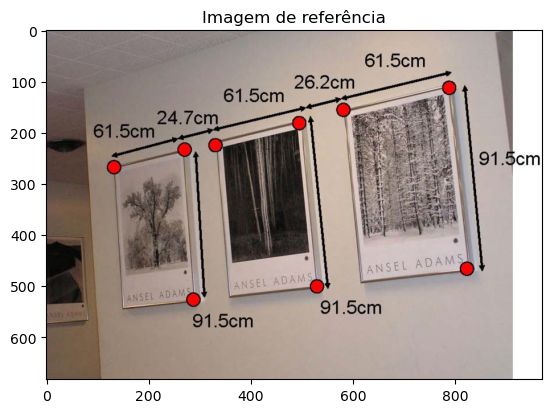

In [481]:
# Coordenadas dos pontos
world_pts = np.array([[ 0,   0],
                      [61.5, 0],
                      [61.5, 91.5],
                      [ 0,   91.5],
                      
                      [ 86.2, 0],
                      [147.7, 0],
                      [147.7, 91.5],
                      [ 86.2, 91.5],

                      [173.9, 0],
                      [235.4, 0],
                      [235.4, 91.5],
                      [173.9, 91.5]])

# Plot da imagem de referência
image0 = cv2.imread("Imagens//Quadros_ref.jpg")
image_rgb0 = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb0)
plt.title("Imagem de referência")
plt.show()

#### Quadros 1

##### Pontos selecionados

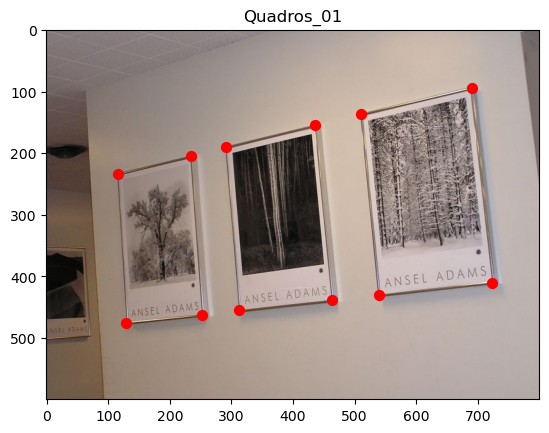

In [485]:
image1 = cv2.imread("Imagens//Quadros_01.jpg")
image_rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Coordenadas dos pontos escolhidos
image_points1 = [(116, 234), (235, 205), (252, 462), (129, 475),
                 (291, 190), (435, 155), (464, 439), (312, 454),
                 (510, 137), (690, 94),  (723, 410), (540, 430)]

plt.imshow(image_rgb1)
for point in image_points1:
    plt.scatter(point[0], point[1], c="red", s=50)
plt.title("Quadros_01")
plt.show()

##### Obtendo a homografia e corrigindo a perspectiva

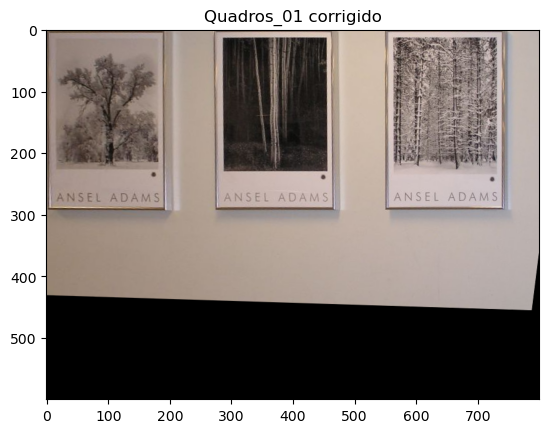

In [488]:
# Coordenadas dos pontos escolhidos na imagem
img_pts_1 = np.array([[116, 234], 
                      [235, 205], 
                      [252, 462], 
                      [129, 475],
                      [291, 190], 
                      [435, 155], 
                      [464, 439], 
                      [312, 454],
                      [510, 137], 
                      [690, 94],  
                      [723, 410], 
                      [540, 430]])

# Cálculo da homografia
H1 = find_homography2(3.15*world_pts,img_pts_1)
altura1, largura1 = image1.shape[:2]
imagem_transformada1 = cv2.warpPerspective(image_rgb1, H1, (largura1,altura1),cv2.INTER_LINEAR) # Correção utilizando interpolação bilinear
plt.title("Quadros_01 corrigido")
plt.imshow(imagem_transformada1)
plt.show()

#### Quadros 2

##### Pontos selecionados

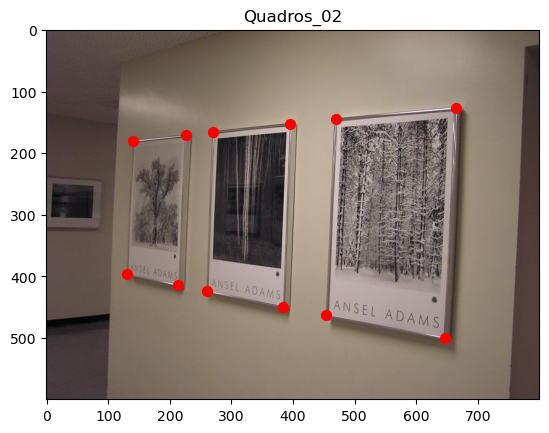

In [492]:
image2 = cv2.imread("Imagens//Quadros_02.jpg")
image_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Coordenadas dos pontos escolhidos
image_points2 = [(140, 180), (227, 170), (214, 414), (131, 396),
                (270, 165), (395, 153), (383, 449), (261, 423),
                (470, 144), (665, 126), (647, 500), (454, 463)]

plt.imshow(image_rgb2)
for point in image_points2:
    plt.scatter(point[0], point[1], c="red", s=50)
plt.title("Quadros_02")
plt.show()

##### Obtendo a homografia e corrigindo a perspectiva

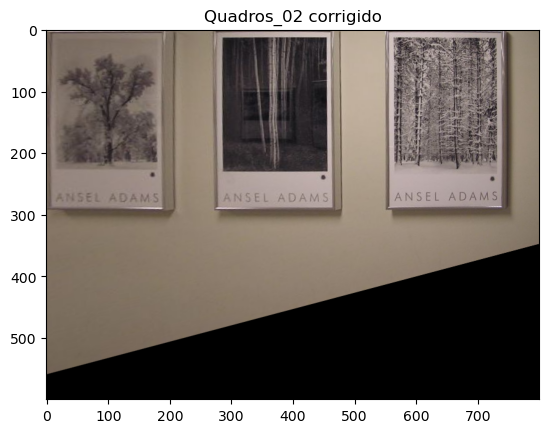

In [495]:
# Coordenadas dos pontos escolhidos na imagem
img_pts_2 = np.array([[140, 180], 
                      [227, 170], 
                      [214, 414], 
                      [131, 396],
                      [270, 165], 
                      [395, 153], 
                      [383, 449], 
                      [261, 423],
                      [470, 144], 
                      [665, 126],  
                      [647, 500], 
                      [454, 463]])

# Cálculo da homografia
H2 = find_homography2(3.15*world_pts,img_pts_2)
altura2, largura2 = image2.shape[:2]
imagem_transformada2 = cv2.warpPerspective(image_rgb2, H2, (largura2,altura2),cv2.INTER_LINEAR) # Correção utilizando interpolação bilinear
plt.title("Quadros_02 corrigido")
plt.imshow(imagem_transformada2)
plt.show()

#### Quadros 3

##### Pontos selecionados

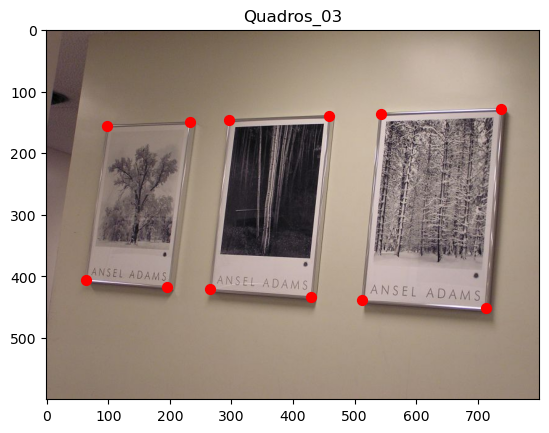

In [499]:
image3 = cv2.imread("Imagens//Quadros_03.jpg")
image_rgb3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

# Coordenadas dos pontos escolhidos
image_points3 = [(98, 156),  (232, 150), (195, 418), (64, 406),
                (296, 146), (458, 140), (429, 434), (265, 421),
                (542, 137), (738, 128), (713, 452), (512, 438)]

plt.imshow(image_rgb3)
for point in image_points3:
    plt.scatter(point[0], point[1], c="red", s=50)
plt.title("Quadros_03")
plt.show()

##### Obtendo a homografia e corrigindo a perspectiva

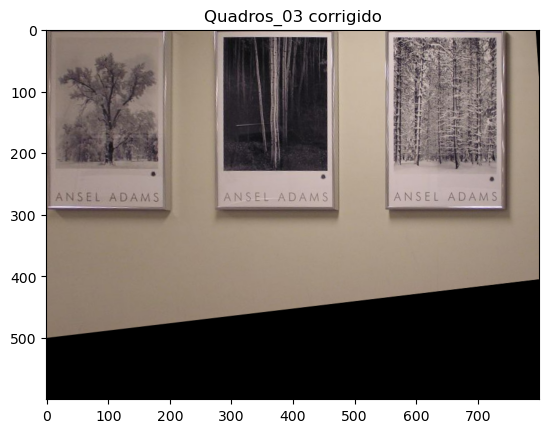

In [502]:
# Coordenadas dos pontos escolhidos na imagem
img_pts_3 = np.array([[98, 156], 
                      [232, 150], 
                      [195, 418], 
                      [64, 406],
                      [296, 146], 
                      [458, 140], 
                      [429, 434], 
                      [265, 421],
                      [542, 137], 
                      [738, 128],  
                      [713, 452], 
                      [512, 438]])

# Cálculo da homografia
H3 = find_homography2(3.15*world_pts,img_pts_3)
altura3, largura3 = image3.shape[:2]
imagem_transformada3= cv2.warpPerspective(image_rgb3, H3, (largura3,altura3),cv2.INTER_LINEAR) # Correção utilizando interpolação bilinear
plt.title("Quadros_03 corrigido")
plt.imshow(imagem_transformada3)
plt.show()

#### Imagem própria

##### Visualização da imagem de referência

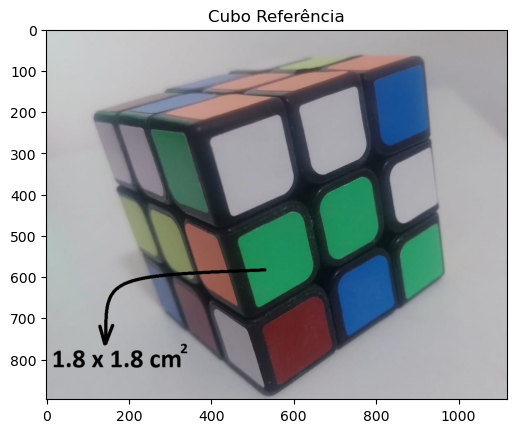

In [506]:
image4     = cv2.imread("Imagens//cubo_referencia.jpg")
image_rgb4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb4)
plt.title("Cubo Referência")
plt.show()

##### Pontos selecionados

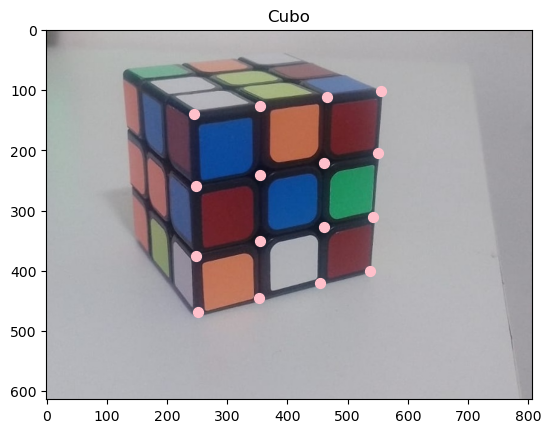

In [509]:
image5 = cv2.imread("Imagens//cubo.jpg")
image_rgb5 = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)

# Coordenadas dos pontos escolhidos
image_points5 = [(245, 140),  (355, 126), (465, 111), (555, 101),
                 (248, 260),  (355, 241), (460, 221), (550, 205),
                 (248, 375),  (355, 351), (460, 327), (542, 310),
                 (252, 468),  (352, 445), (454, 421), (538, 400)]

plt.imshow(image_rgb5)
for point in image_points5:
    plt.scatter(point[0], point[1], c="pink", s=50)
plt.title("Cubo")
plt.show()

##### Obtendo a homografia e corrigindo a perspectiva

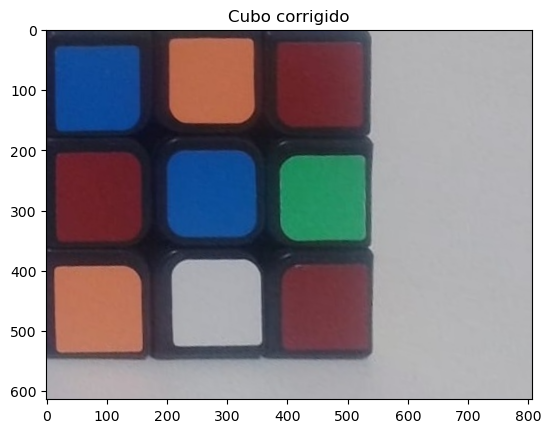

In [512]:
# Coordenadas dos pontos no mundo
world_pts2 = np.array([[0, 0],
                       [0.018, 0],
                       [0.036, 0],
                       [0.054, 0],
                       
                       [0, 0.018],
                       [0.018, 0.018],
                       [0.036, 0.018],
                       [0.054, 0.018],
                      
                       [0, 0.036],
                       [0.018, 0.036],
                       [0.036, 0.036],
                       [0.054, 0.036],
                      
                       [0, 0.054],
                       [0.018, 0.054],
                       [0.036, 0.054],
                       [0.054, 0.054]])

# Coordenadas dos pontos selecionados na imagem
img_pts_4 = np.array([[245, 140], 
                      [355, 126], 
                      [465, 111], 
                      [555, 101],
                     
                      [248, 260], 
                      [355, 241], 
                      [460, 221], 
                      [550, 205],
                     
                      [248, 375], 
                      [355, 351], 
                      [460, 327], 
                      [542, 310],
                     
                      [252, 468], 
                      [352, 445], 
                      [454, 421], 
                      [538, 400]])

# Cálculo da homografia 
H4 = find_homography2(10000*world_pts2,img_pts_4)
altura5, largura5 = image5.shape[:2]
imagem_transformada4 = cv2.warpPerspective(image_rgb5, H4, (largura5,altura5),cv2.INTER_LINEAR) # Correção utilizando interpolação bilinear
plt.title("Cubo corrigido")
plt.imshow(imagem_transformada4)
plt.show()

#### Função auxiliar utilizada

##### Função para obter a homografia dado dois conjuntos de pontos em 2D

In [516]:
def find_homography2(pts1,pts2):

    n = pts1.shape[0]
    A = np.zeros((2 * n, 9)) 
    
    normalized_pts1, T_1 = normalize_points(pts1);
    normalized_pts2, T_2 = normalize_points(pts2);
    
    for i in range(n):
        x1, y1,      = normalized_pts1[i]
        x2, y2       = normalized_pts2[i]
        A[2 * i]     = [x2, y2, 1, 0, 0, 0, -x2*x1, -y2*x1, -x1];
        A[2 * i + 1] = [0, 0, 0, x2, y2, 1, -x2*y1, -y2*y1, -y1];
    
    A = np.array(A)
    _, _, Vt = linalg.svd(A)
    H  = Vt[-1].reshape(3, 3)
    H  = np.linalg.inv(T_1) @ H @ T_2
    
    return H